# Predictive Modeling ShowTime - Problem Statement

**Installing and Importing Necessary Libraries**

In [1]:
# Installing the libraries with the specified version.
!pip install pandas==2.0.3 numpy==1.25.2 seaborn==0.13.1 matplotlib==3.7.1 scikit-learn==1.2.2 statsmodels==0.14.2 -q --user

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import matplotlib

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Data Preparation

**Load Data**

In [3]:
# to Read the data
df = pd.read_csv('ottdata.csv')

In [4]:
# let's check the first 5 rows of the data
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [5]:
# let's check the shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1000 rows and 8 columns.


In [6]:
# let's check column types and number of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,NaN,NaN,NaN,0.4,0.490143,0.0,0.0,0.0,1.0,1.0
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89


## Exploratory Data Analysis (EDA)

### Visualize Data

### Univariate Analysis

In [8]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print(num_cols)

['visitors', 'ad_impressions', 'major_sports_event', 'views_trailer', 'views_content']


In [9]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="Red"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="Purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="green", linestyle="-"
    )  # Add median to the histogram

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

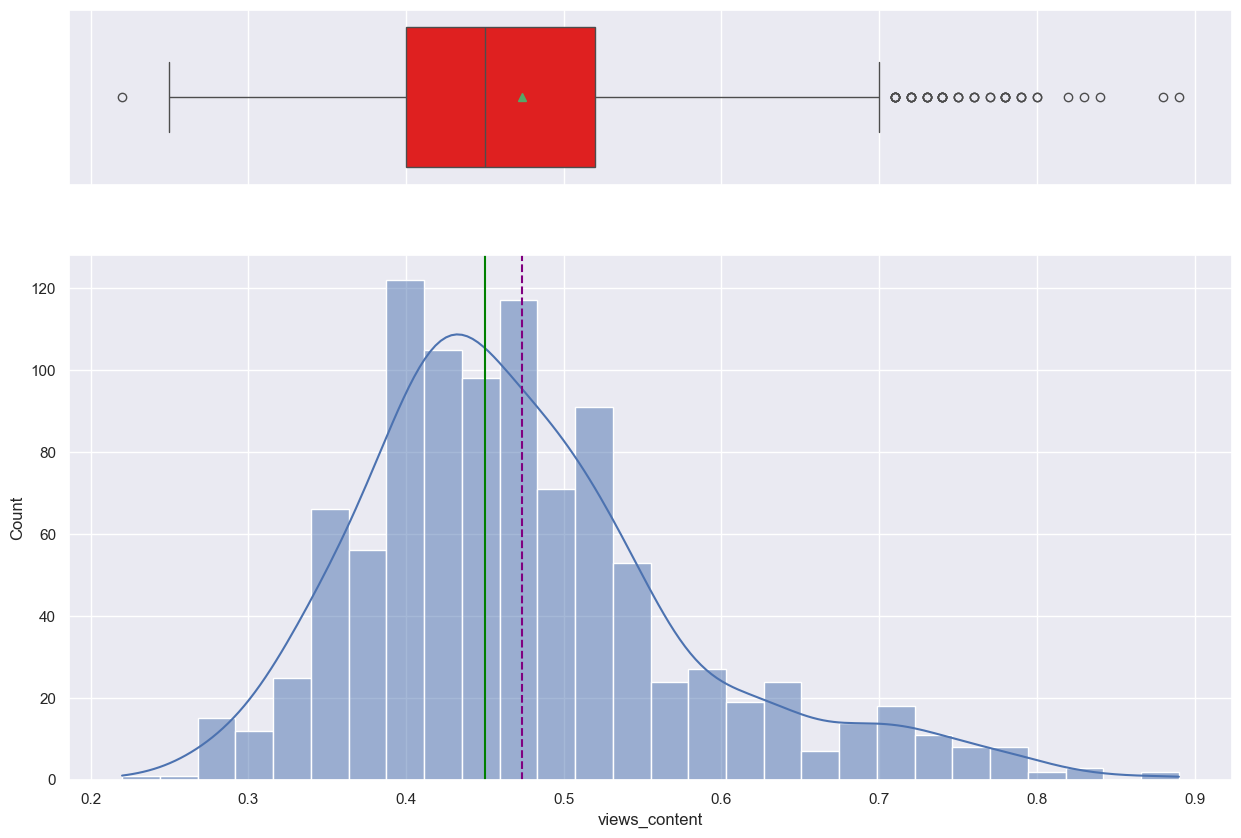

In [11]:
# views_content histplot
histogram_boxplot(df, "views_content")

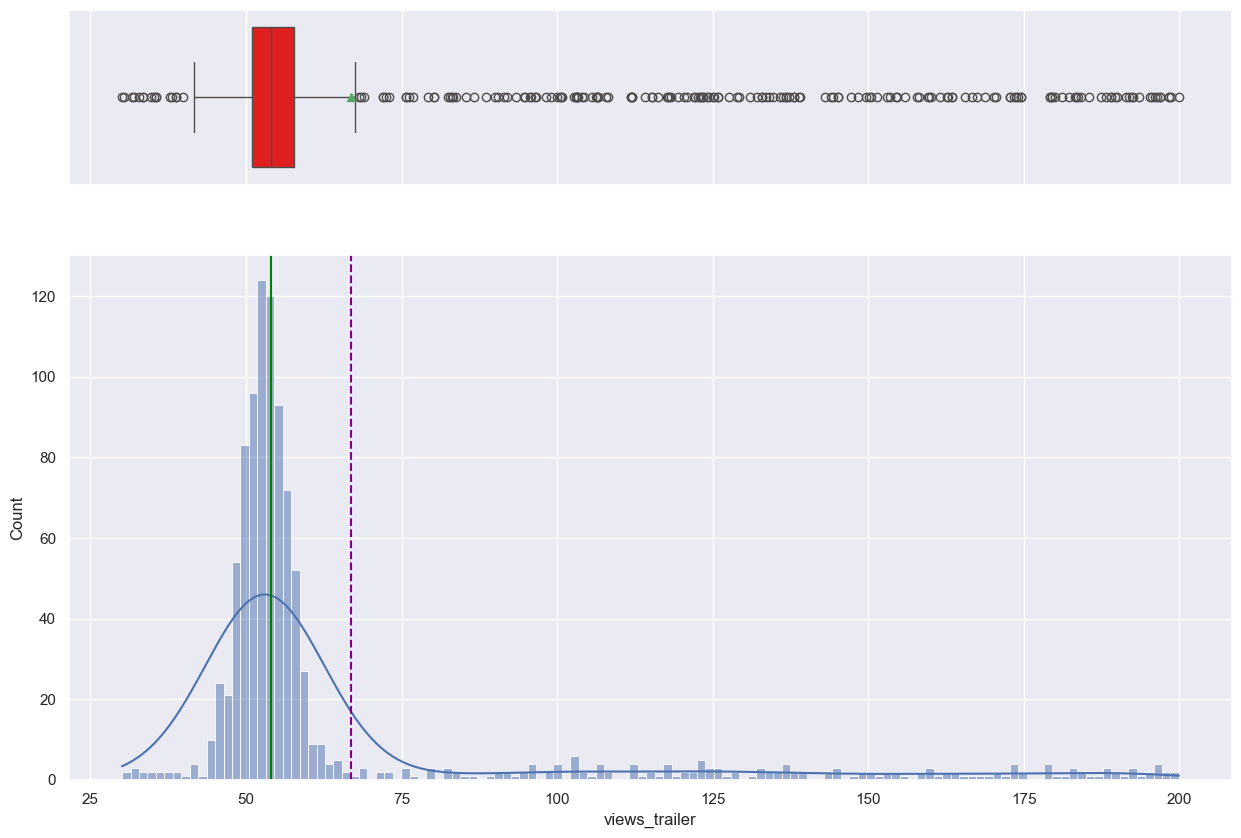

In [12]:
# views_trailer histplot
histogram_boxplot(df, "views_trailer")

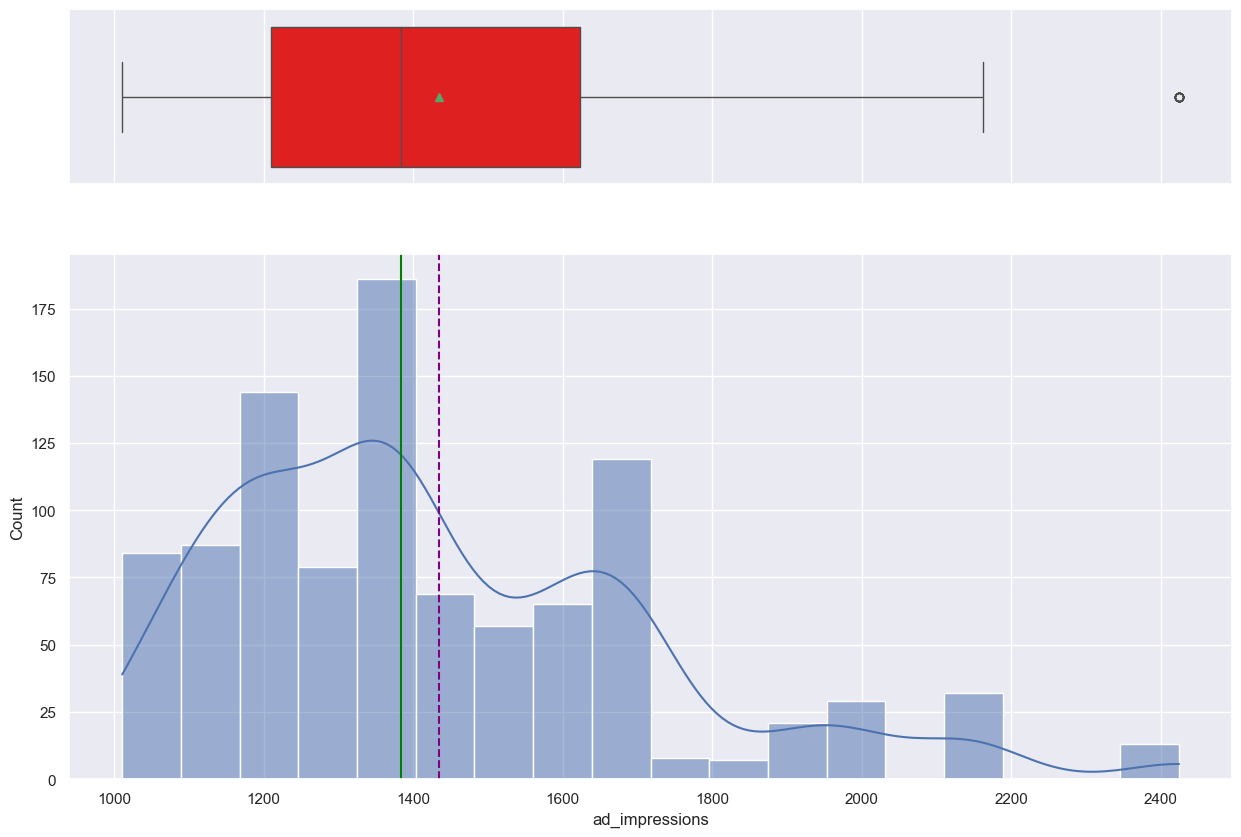

In [13]:
# ad_impressions histplot
histogram_boxplot(df, "ad_impressions")

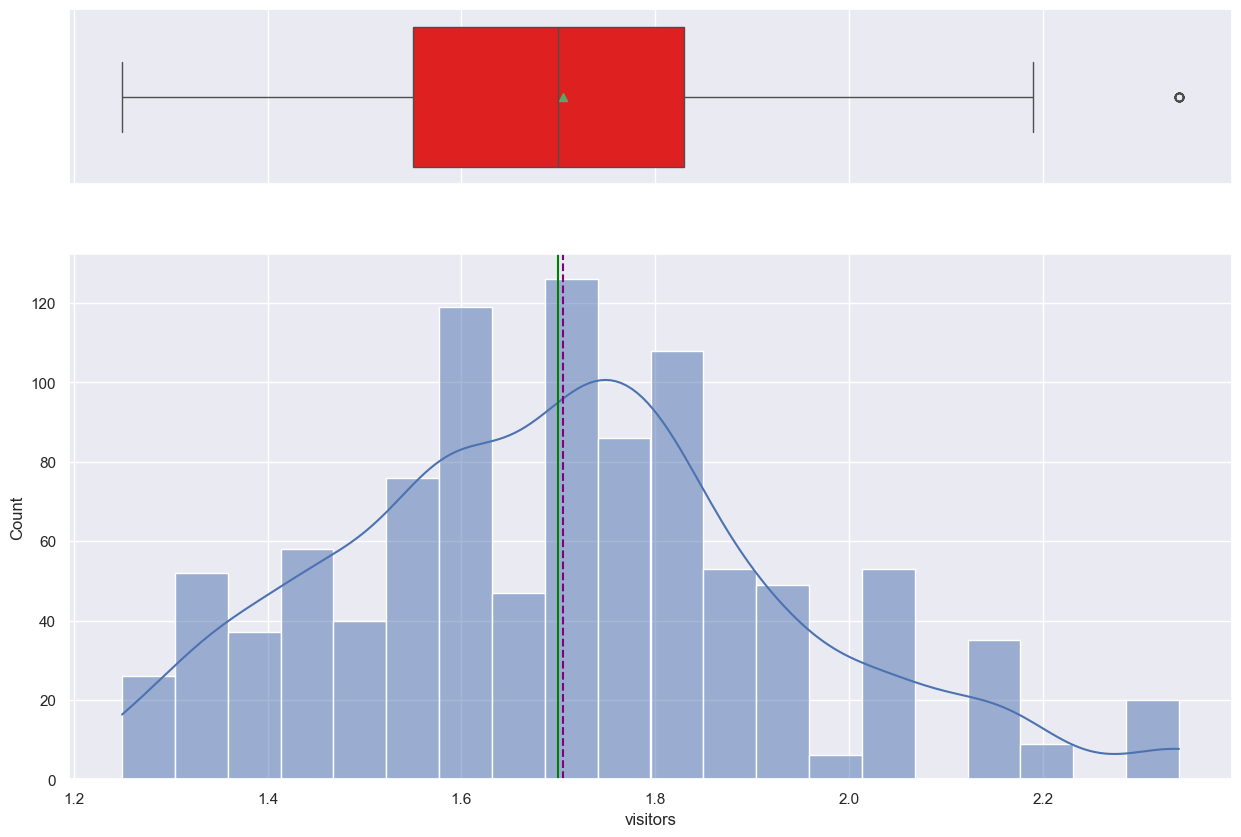

In [14]:
# Visitors histplot
histogram_boxplot(df, "visitors")

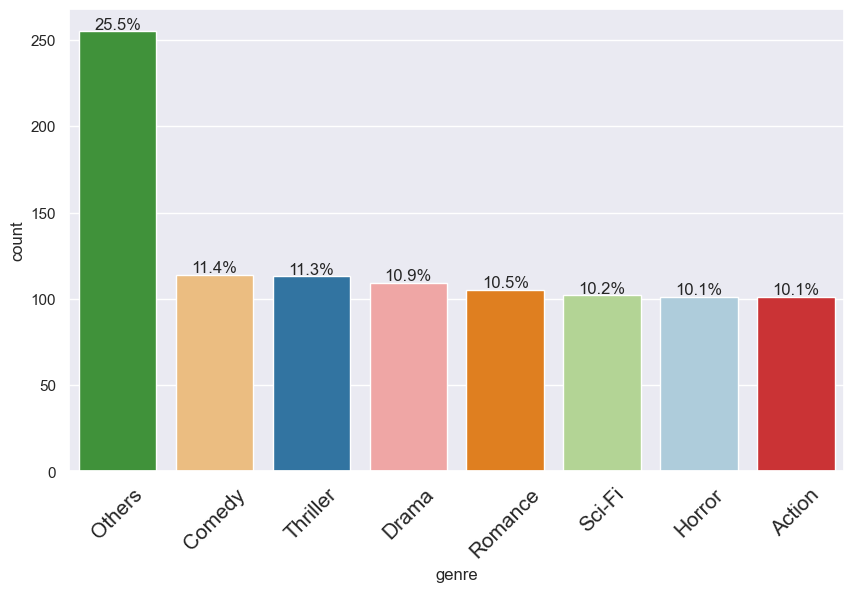

In [15]:
labeled_barplot(df, "genre", perc=True)

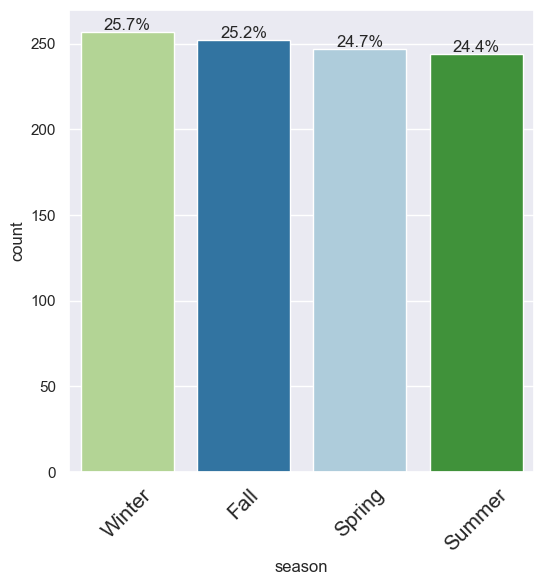

In [16]:
labeled_barplot(df, "season", perc=True)

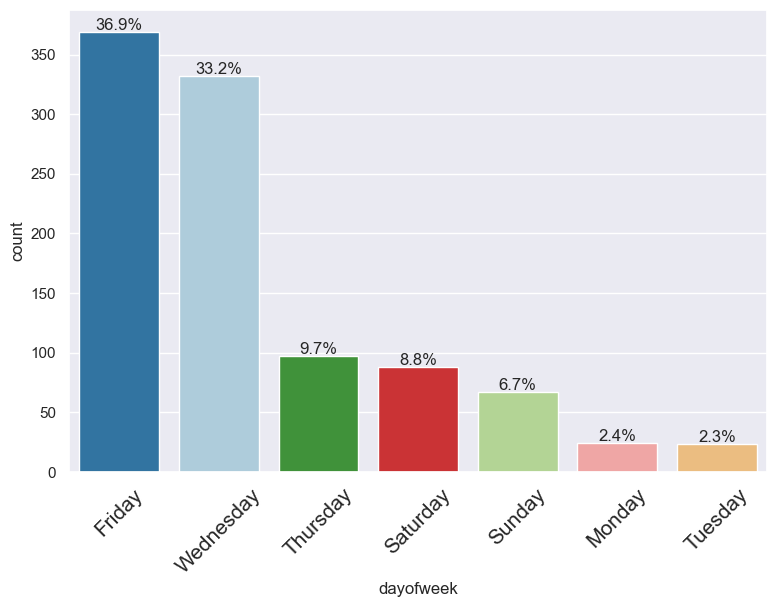

In [17]:
labeled_barplot(df, "dayofweek", perc=True);

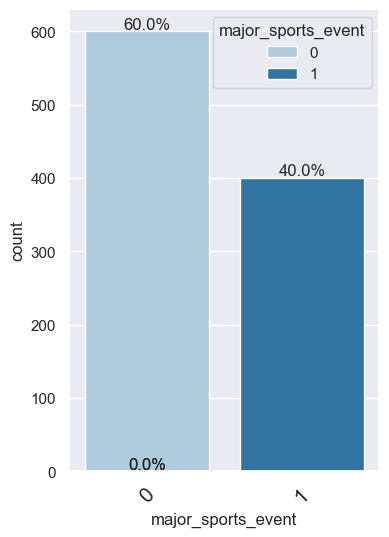

In [18]:
# major_sports_event histplot
labeled_barplot(df, "major_sports_event", perc=True)

### Bivariate analysis

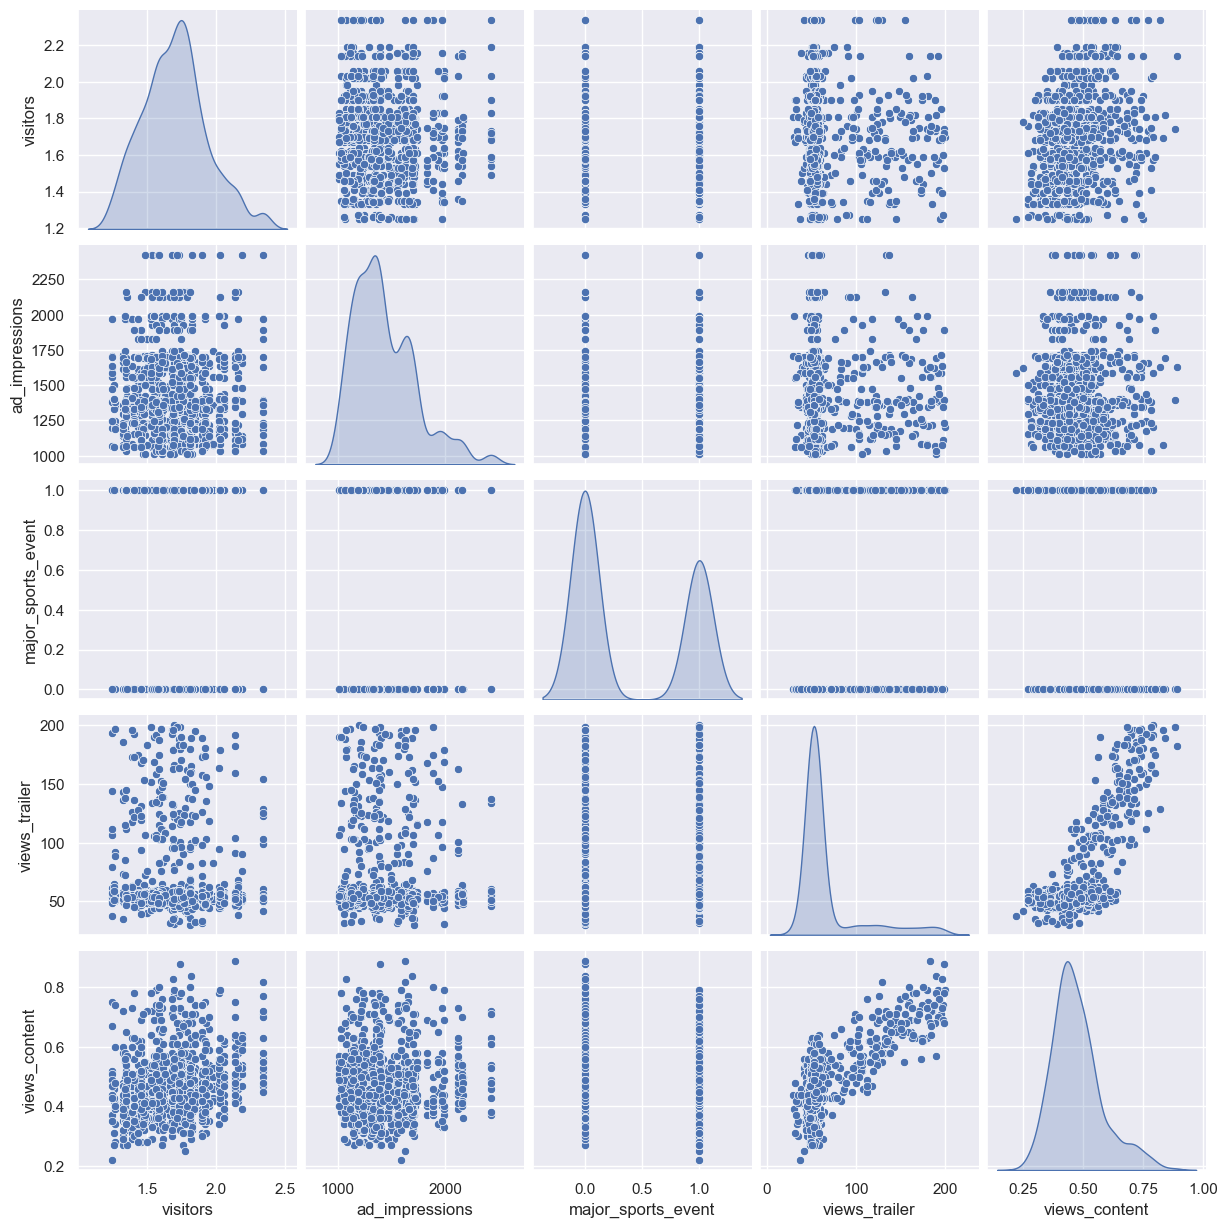

In [19]:
sns.pairplot(
    df, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag

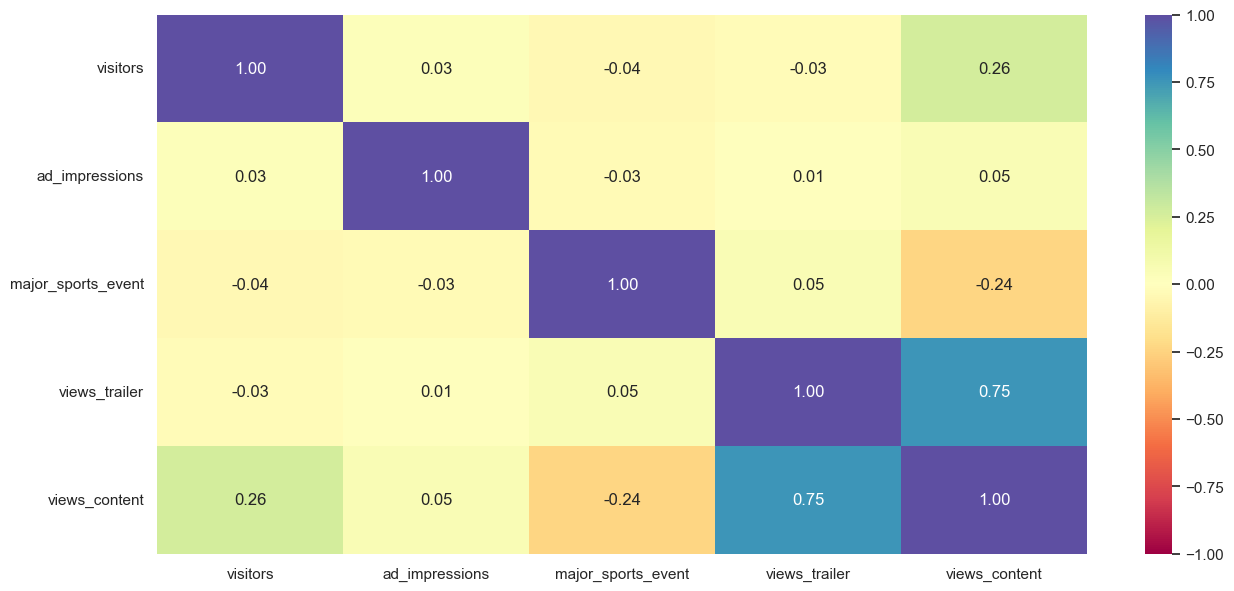

In [20]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

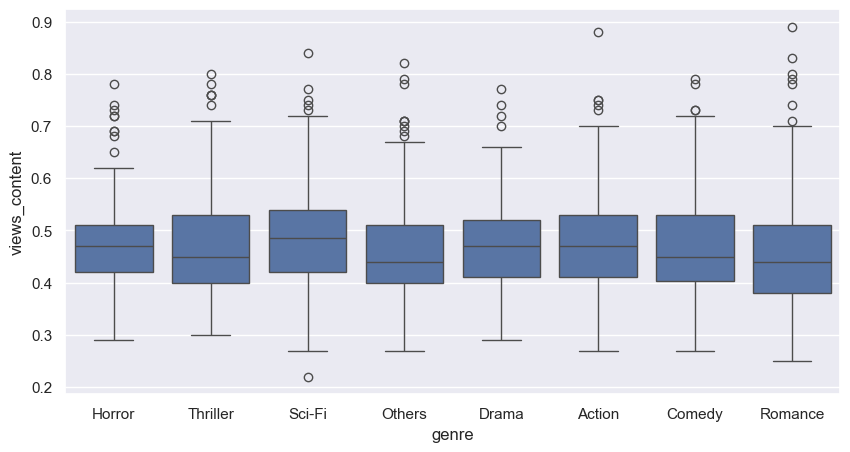

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="views_content")
plt.show()

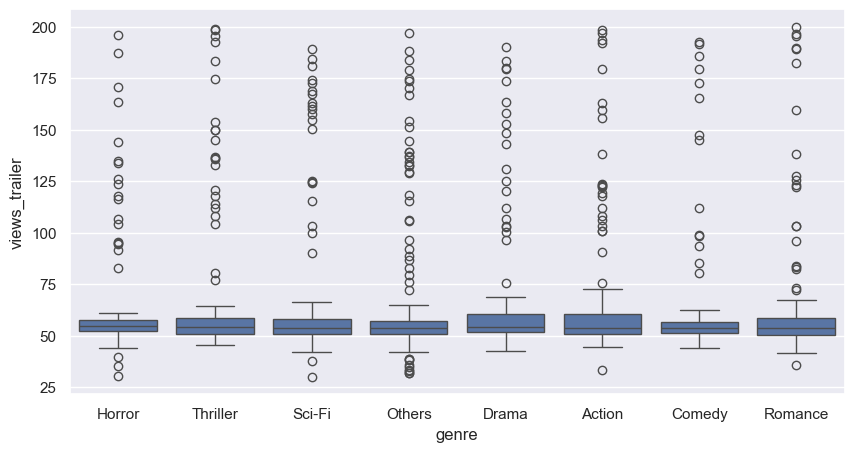

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="views_trailer")
plt.show()

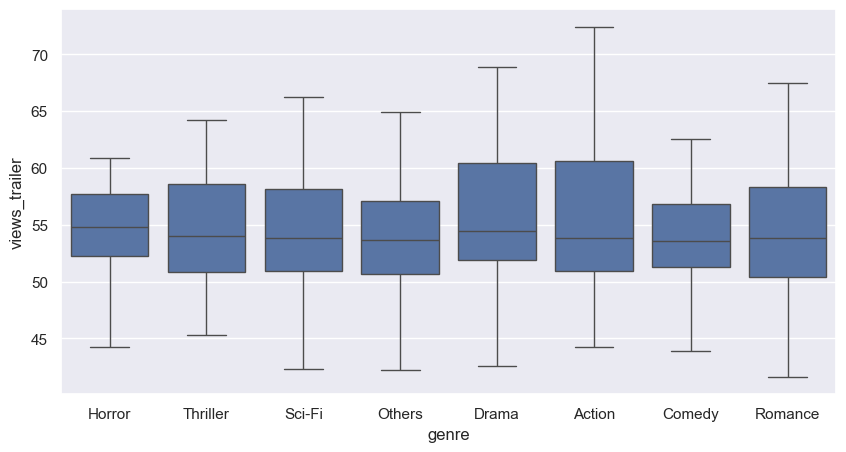

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="views_trailer",showfliers = False)
plt.show()

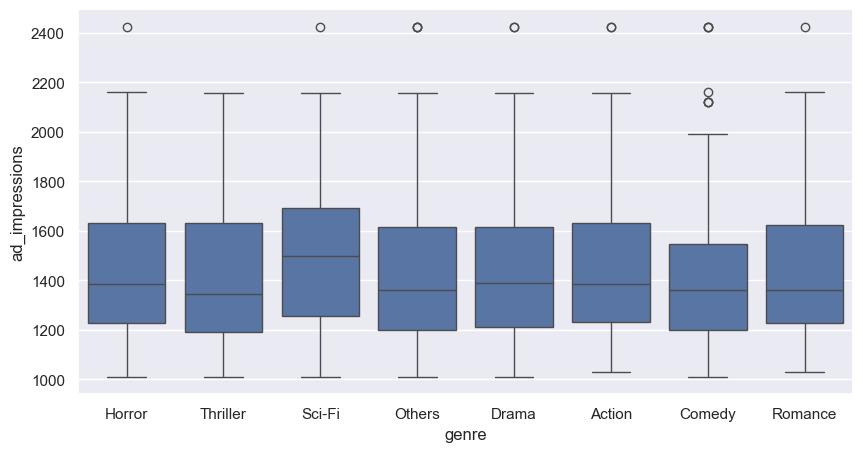

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="ad_impressions")
plt.show()

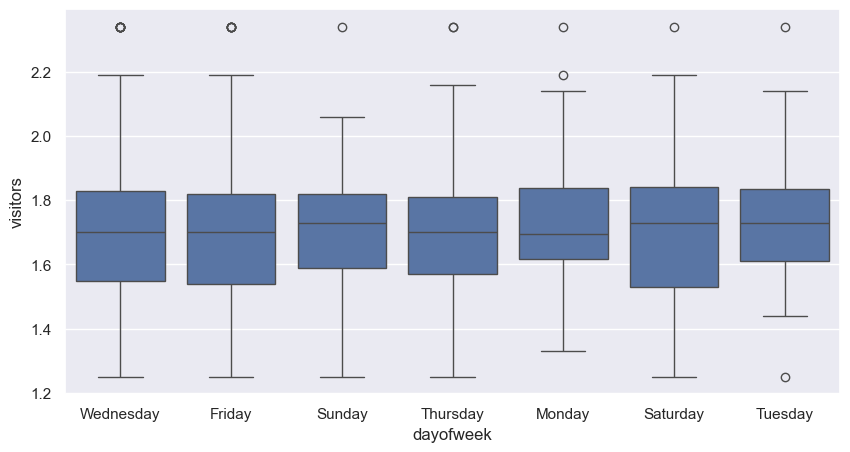

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="dayofweek", y="visitors")
plt.show()

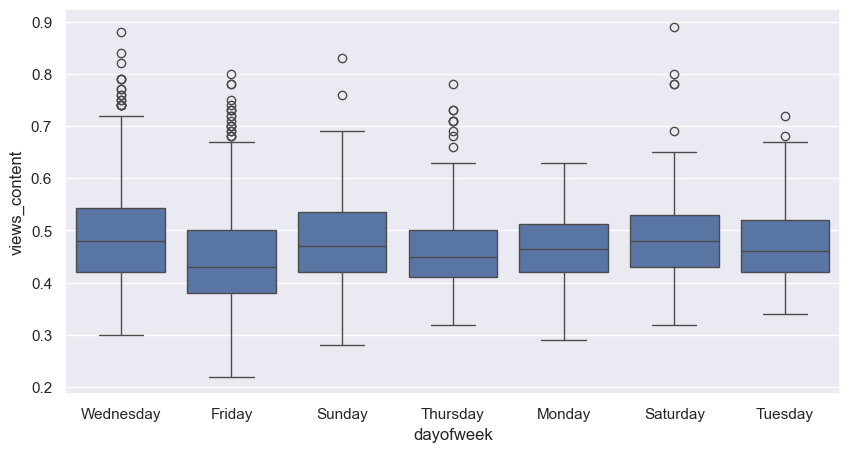

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="dayofweek", y="views_content")
plt.show()

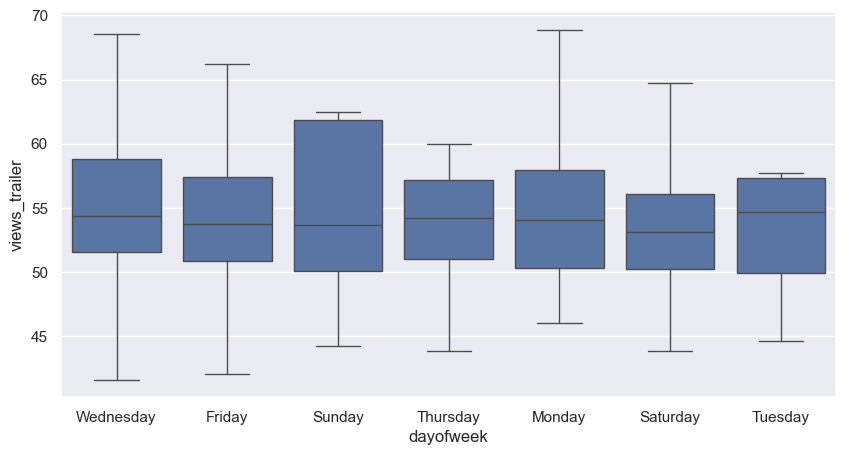

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="dayofweek", y="views_trailer",showfliers = False)
plt.show()

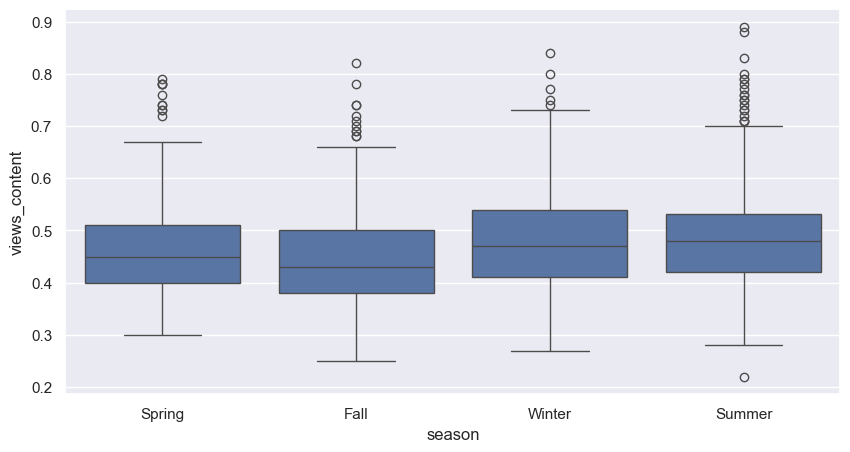

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="season", y="views_content")
plt.show()

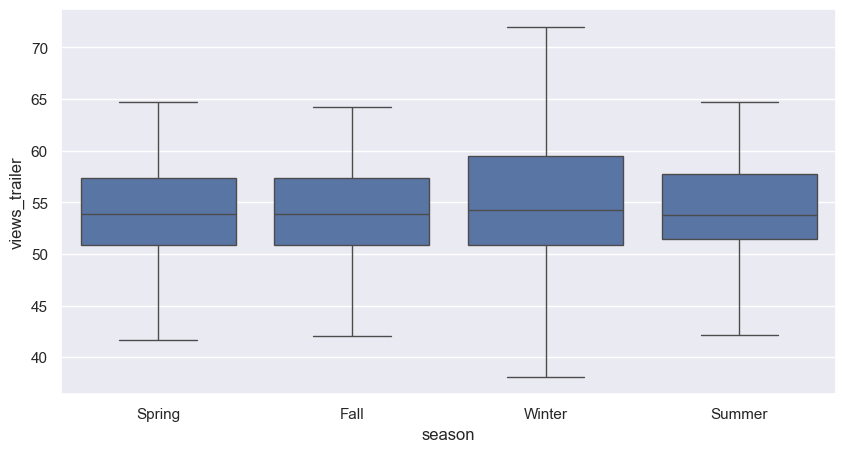

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="season", y="views_trailer", showfliers = False)
plt.show()

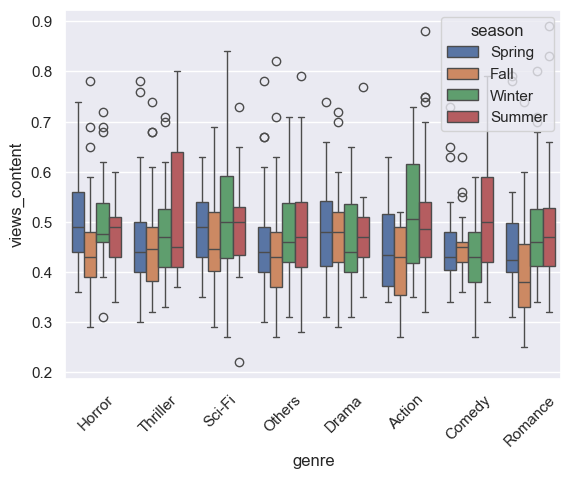

In [30]:
sns.boxplot(data=df, x='genre',y='views_content',hue='season')
plt.xticks(rotation=45);

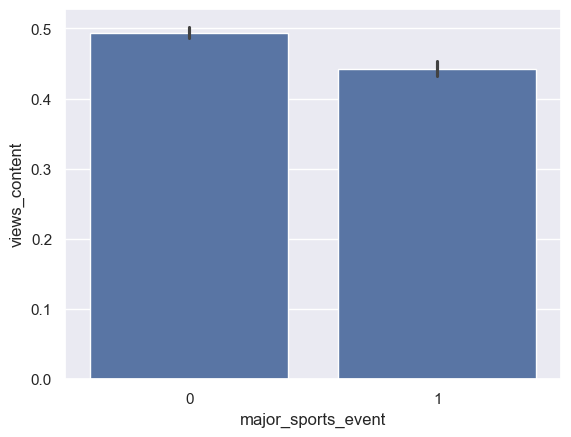

In [31]:
sns.barplot(data=df, x='major_sports_event',y='views_content');

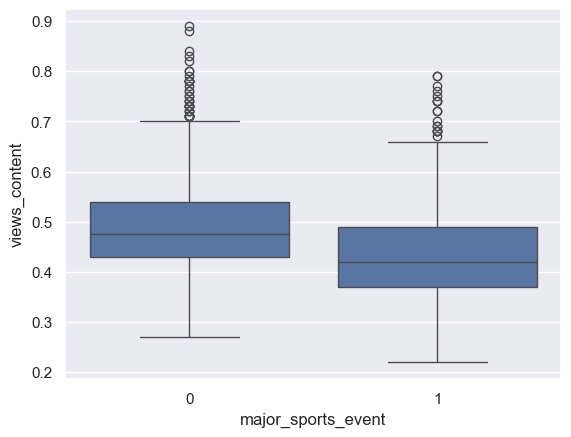

In [32]:
sns.boxplot(data=df, x='major_sports_event',y='views_content');

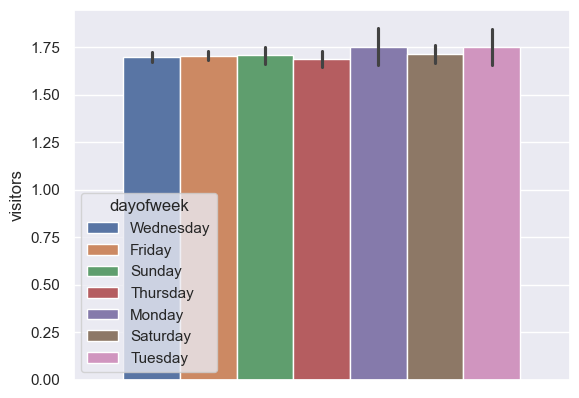

In [33]:
sns.barplot(data=df, hue='dayofweek', y='visitors');

<Figure size 3000x1000 with 0 Axes>

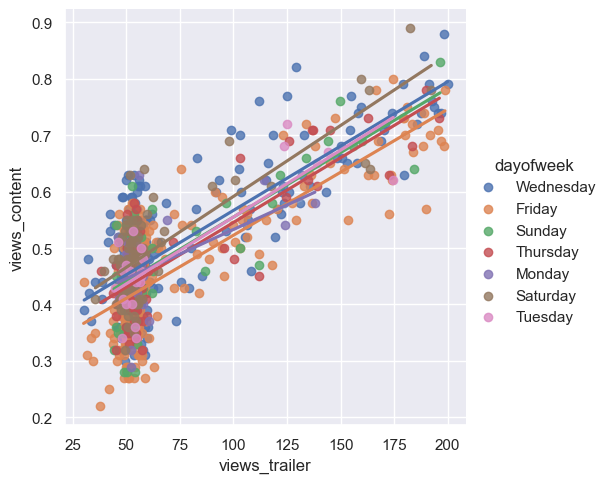

In [34]:
plt.figure(figsize = (30,10))
sns.lmplot(data=df, x='views_trailer',y='views_content',hue='dayofweek',ci=False);

## Questions to be Answered

**1. What does the distribution of content views look like?**

Text(0, 0.5, 'Count')

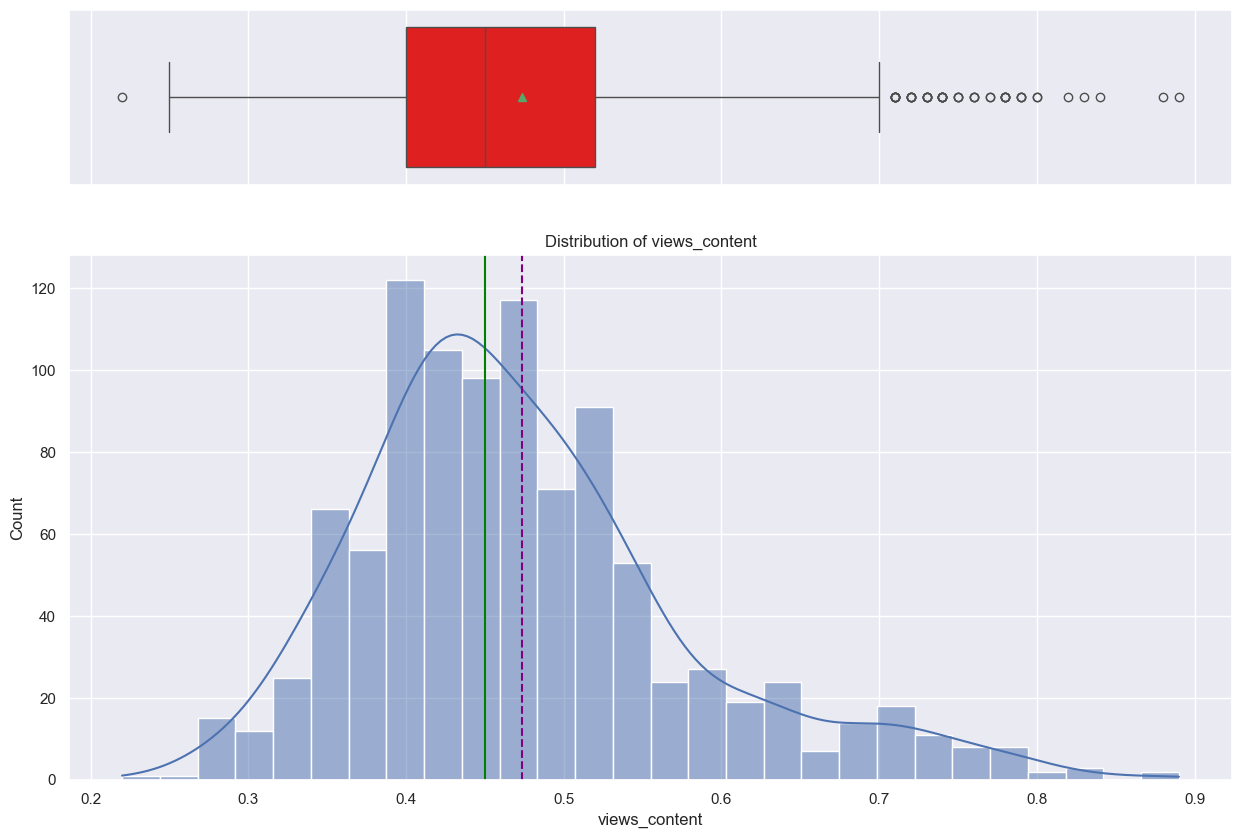

In [35]:
histogram_boxplot(df, "views_content")
plt.title('Distribution of views_content')
plt.xlabel('views_content')
plt.ylabel('Count')

**Answer: The average number of content views appears to be less than 0.5 million.**

**2. What does the distribution of genres look like?**

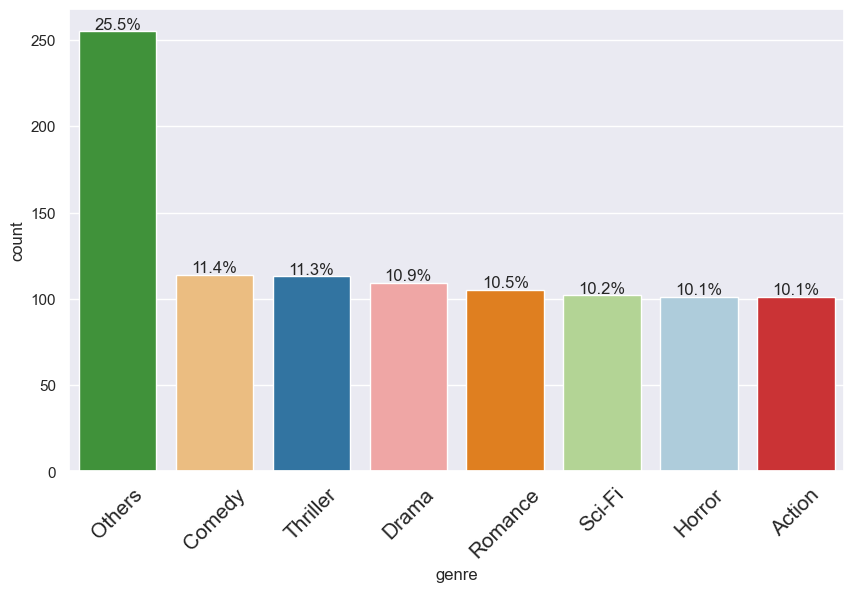

In [36]:
# Plot the distribution of genres
labeled_barplot(df, "genre", perc=True)

**3: The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?**

C:\Users\agnes\AppData\Local\Temp\ipykernel_2060\1416969378.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=viewership_by_day.index, y=viewership_by_day.values, palette='viridis')


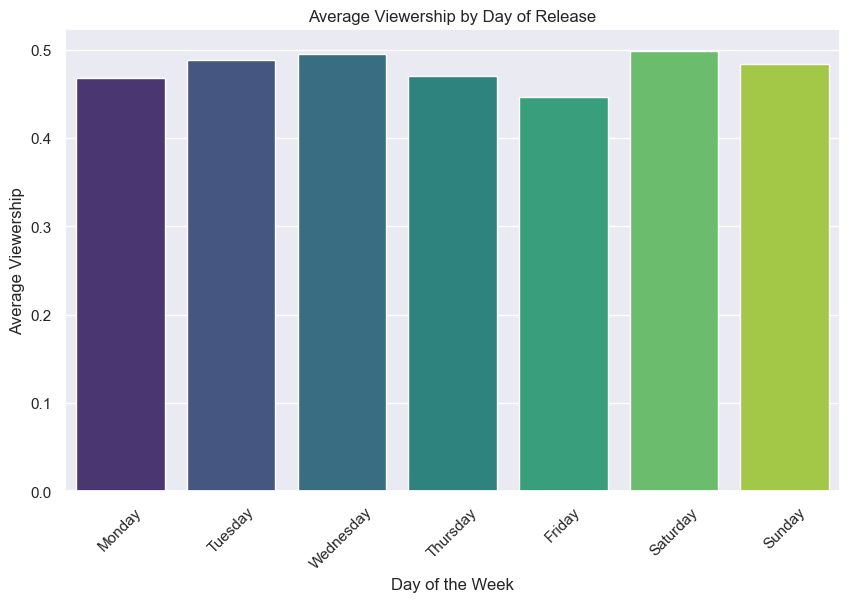

In [37]:
# Calculate the average views_content for each day of the week
viewership_by_day = df.groupby('dayofweek')['views_content'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the viewership variation with the day of release
plt.figure(figsize=(10, 6))
sns.barplot(x=viewership_by_day.index, y=viewership_by_day.values, palette='viridis')
plt.title('Average Viewership by Day of Release')
plt.xlabel('Day of the Week')
plt.ylabel('Average Viewership')
plt.xticks(rotation=45)
plt.show()

**4.How does the viewership vary with the season of release?**

C:\Users\agnes\AppData\Local\Temp\ipykernel_2060\990953788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=viewership_by_season.index, y=viewership_by_season.values, palette='viridis')


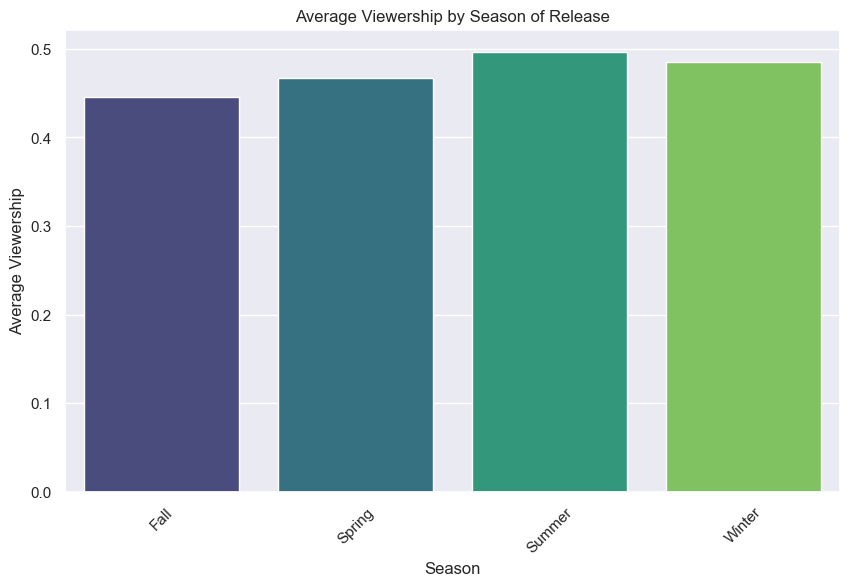

In [38]:
# Calculate the average views_content for each season
viewership_by_season = df.groupby('season')['views_content'].mean()

# Plot the viewership variation with the season of release
plt.figure(figsize=(10, 6))
sns.barplot(x=viewership_by_season.index, y=viewership_by_season.values, palette='viridis')
plt.title('Average Viewership by Season of Release')
plt.xlabel('Season')
plt.ylabel('Average Viewership')
plt.xticks(rotation=45)
plt.show()

**5: What is the correlation between trailer views and content views?**

Pearson correlation coefficient between trailer views and content views: 0.7539622148205363


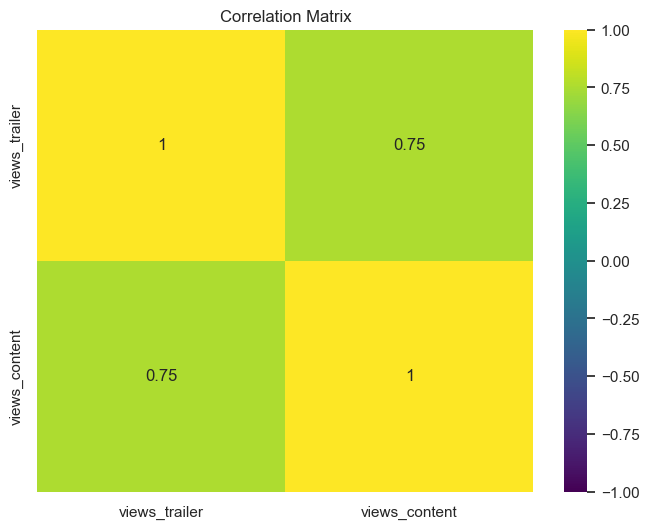

In [39]:
# Calculate the Pearson correlation coefficient
correlation = df['views_trailer'].corr(df['views_content'])
print(f"Pearson correlation coefficient between trailer views and content views: {correlation}")
# Visualize the correlation matrix using a heatmap
correlation_matrix = df[['views_trailer', 'views_content']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

**Data preparation for modeling**

**Data Cleaning**

In [40]:
# Checking duplicate values
df.duplicated().sum()

0

In [41]:
# Checking missing values
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

**Outlier Detection**

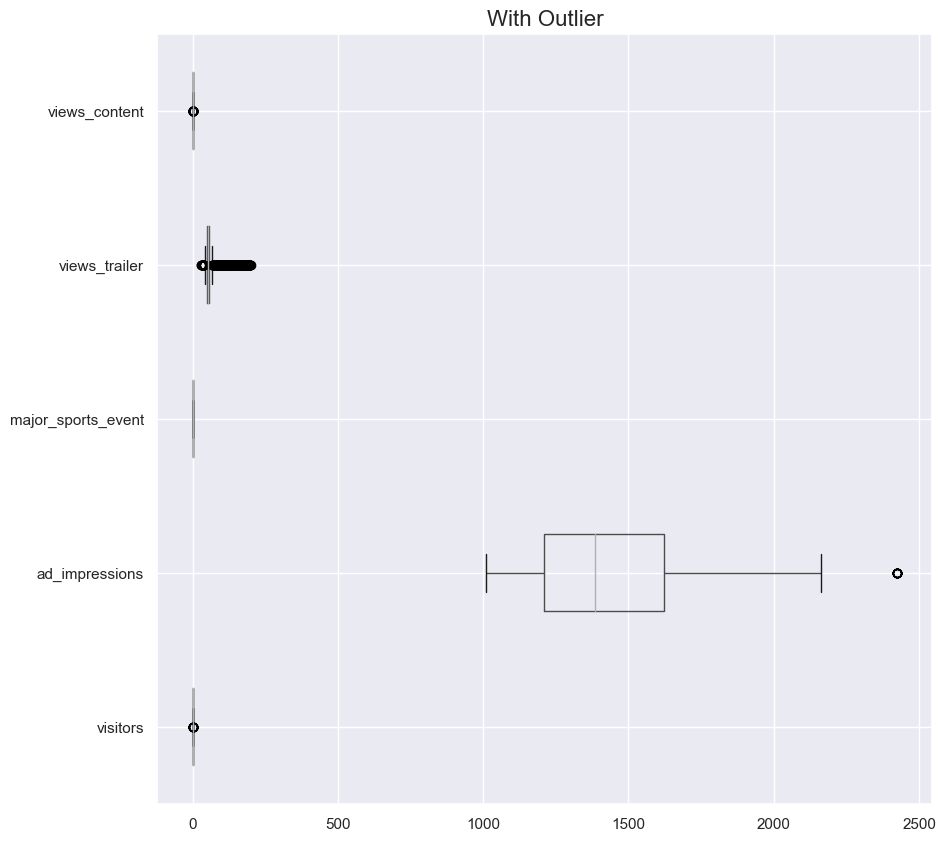

In [42]:
plt.figure(figsize=(10,10))
cont=df.dtypes[(df.dtypes!='object')].index
df[cont].boxplot(vert=0)
plt.title('With Outlier',fontsize=16)
plt.show()

In [43]:
# Example function to remove outliers
def remove_outlier(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_range = q1 - 1.5 * iqr
    upper_range = q3 + 1.5 * iqr
    return lower_range, upper_range

# Outlier Detection and Handling
for column in df.select_dtypes(include=[np.number]).columns:
    lr, ur = remove_outlier(df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])

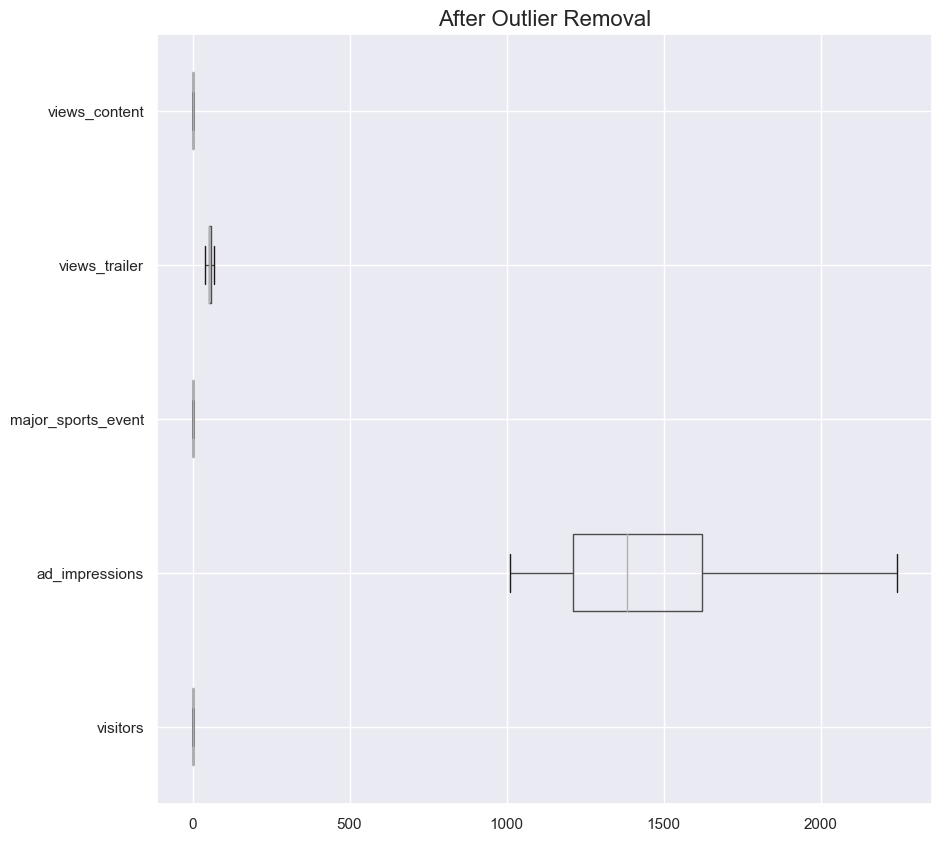

In [44]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

**Feature Engineering**

In [45]:
#For the column major_sports_event, replace the 1 values with 'yes' and 0 values with 'no'.
df["major_sports_event"] = df["major_sports_event"].replace({1: "yes", 0: "no"})

In [46]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,no,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,yes,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,yes,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,yes,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,no,Sci-Fi,Sunday,Winter,55.83,0.46


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   object 
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


**Data preparation for modeling**

In [48]:
#Create Dummy Variables
# drop_first=True will drop one of the extra columns
df = pd.get_dummies(df, columns=df.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
df.head()

,visitors,ad_impressions,views_trailer,views_content,major_sports_event_yes,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,56.70,0.51,False,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.46,1498.41,52.69,0.32,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.47,1079.19,48.74,0.39,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.85,1342.77,49.81,0.44,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.46,1498.41,55.83,0.46,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [49]:
#Split Data
# defining X and y variables
X = df.drop(["views_content"], axis=1)
y = df["views_content"]

print(X.head())
print(y.head())

   visitors  ad_impressions  views_trailer  major_sports_event_yes  \
0      1.67         1113.81          56.70                   False   
1      1.46         1498.41          52.69                    True   
2      1.47         1079.19          48.74                    True   
3      1.85         1342.77          49.81                    True   
4      1.46         1498.41          55.83                   False   

   genre_Comedy  genre_Drama  genre_Horror  genre_Others  genre_Romance  \
0         False        False          True         False          False   
1         False        False         False         False          False   
2         False        False         False         False          False   
3         False        False         False         False          False   
4         False        False         False         False          False   

   genre_Sci-Fi  genre_Thriller  dayofweek_Monday  dayofweek_Saturday  \
0         False           False             False      

In [50]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,visitors,ad_impressions,views_trailer,major_sports_event_yes,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,56.70,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.46,1498.41,52.69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.47,1079.19,48.74,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.85,1342.77,49.81,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.46,1498.41,55.83,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
# let's add the intercept to data
X = sm.add_constant(X)

In [52]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


## Model Selection and Training

**Build the Model**

In [53]:
# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [54]:
x_train

,const,visitors,ad_impressions,views_trailer,major_sports_event_yes,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
731,1.0,1.64,1992.53,49.62000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
716,1.0,1.69,2158.03,67.96625,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
640,1.0,1.47,1229.35,54.13000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
804,1.0,1.49,1010.87,67.96625,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
737,1.0,2.19,1119.90,52.04000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,1.0,1.57,1323.74,55.61000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
72,1.0,1.77,1700.04,54.98000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
908,1.0,1.54,1398.05,53.75000,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
235,1.0,2.02,1284.86,67.96625,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Add a constant term for the intercept
x_train_sm = sm.add_constant(x_train)

# Build the model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     60.73
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          2.15e-136
Time:                        12:55:36   Log-Likelihood:                 986.21
No. Observations:                 700   AIC:                            -1930.
Df Residuals:                     679   BIC:                            -1835.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

## How to check for Multicollinearity

* There are different ways of detecting (or testing) multicollinearity. One such way is Variation Inflation Factor.

* Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient Bk
 is "inflated" by the existence of correlation among the predictor variables in the model.

#### General Rule of Thumb:

* If VIF is 1, then there is no correlation among the kth predictor and the remaining predictor variables, and hence, the variance of 
Bk is not inflated at all.
* If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
* The purpose of the analysis should dictate which threshold to use.

#### Model Performance Check
*Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and R -Squared
* We will define a function to calculate MAPE and adjusted R -Squared
* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
* We will create a function which will print out all the above metrics in one go.

In [56]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [57]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.059142,0.046708,0.64141,0.630303,10.199322


In [58]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.065309,0.052897,0.561854,0.528757,11.506957


## Testing the assumptions of linear regression model
We will be checking the following Linear Regression assumptions:

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

## TEST FOR MULTICOLLINEARITY
* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* Variance Inflation Factor (VIF): Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk
 is "inflated" by the existence of correlation among the predictor variables in the model.

* If VIF is 1, then there is no correlation among the k
th predictor and the remaining predictor variables, and hence, the variance of βk
 is not inflated at all.
 
* General Rule of thumb:

* If VIF is between 1 and 5, then there is low multicollinearity.
* If VIF is between 5 and 10, we say there is moderate multicollinearity.
* If VIF is exceeding 10, it shows signs of high multicollinearity.

#### Let's define a function to check VIF.

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [60]:
checking_vif(x_train)

,feature,VIF
0,const,166.186883
1,visitors,1.026119
2,ad_impressions,1.029638
3,views_trailer,1.028166
4,major_sports_event_yes,1.070634
5,genre_Comedy,1.913797
6,genre_Drama,1.921646
7,genre_Horror,1.902867
8,genre_Others,2.567207
9,genre_Romance,1.753305


In [61]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [62]:
col_list = ["genre_Others"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,genre_Others,0.631244,0.060018


In [63]:
col_to_drop = "genre_Others"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  genre_Others


,feature,VIF
0,const,153.669019
1,visitors,1.020698
2,ad_impressions,1.028897
3,views_trailer,1.027870
4,major_sports_event_yes,1.070178
5,genre_Comedy,1.204448
6,genre_Drama,1.223159
7,genre_Horror,1.205554
8,genre_Romance,1.171698
9,genre_Sci-Fi,1.205336


In [64]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     63.98
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          3.02e-137
Time:                        12:55:36   Log-Likelihood:                 986.07
No. Observations:                 700   AIC:                            -1932.
Df Residuals:                     680   BIC:                            -1841.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

## Interpreting the Regression Results:

## Dealing with high p-value variables

* Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
* But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
* Instead, we will do the following:
* Build a model, check the p-values of the variables, and drop the column with the highest p-value
* Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
* Repeat the above two steps till there are no columns with p-value > 0.05

In [65]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'views_trailer', 'major_sports_event_yes', 'genre_Sci-Fi', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [66]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [67]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          5.85e-143
Time:                        12:55:37   Log-Likelihood:                 983.60
No. Observations:                 700   AIC:                            -1941.
Df Residuals:                     687   BIC:                            -1882.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [68]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.059363,0.046772,0.638723,0.631877,10.214645


In [69]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.065566,0.053145,0.558408,0.538336,11.586675


## Assumptions of Linear Regression

These assumptions are essential conditions that should be met before we draw inferences regarding the model estimates or use the model to make a prediction.

For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs residuals. If they don't follow any pattern (the curve is a straight line), then we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try different transformations.

In [70]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.428238,-0.028238
716,0.70,0.629866,0.070134
640,0.42,0.450182,-0.030182
804,0.55,0.576973,-0.026973
737,0.59,0.556401,0.033599


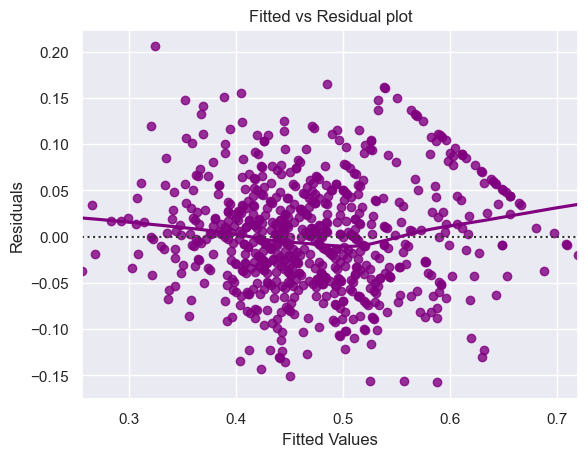

In [71]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

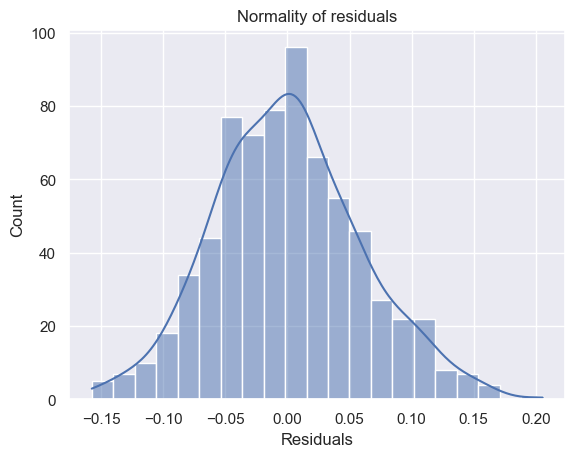

In [72]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The residual terms are normally distributed

**The Q-Q plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.**

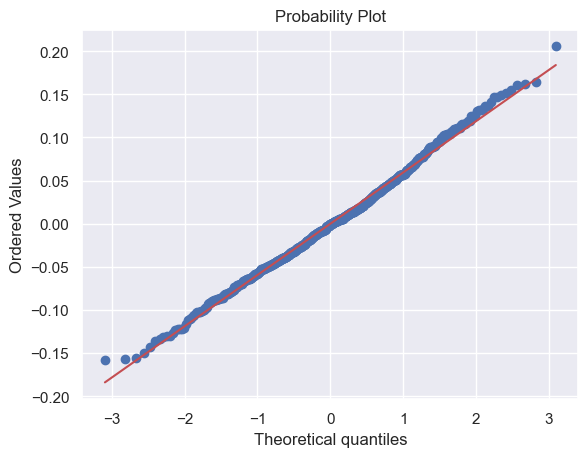

In [73]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* Most of the points are lying on the straight line in QQ plot

In [74]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9955450296401978, pvalue=0.04188501089811325)

### TEST FOR HOMOSCEDASTICITY

* **Homoscedacity** - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* **Heteroscedacity** - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check if model has Heteroscedasticity?**

* Can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.

**How to deal with Heteroscedasticity?**

* Can be fixed via adding other important features or making transformations.

```
The null and alternate hypotheses of the goldfeldquandt test are as follows:

Null hypothesis : Residuals are homoscedastic
Alternate hypothesis : Residuals have hetroscedasticity
```

In [75]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.1616405144400674), ('p-value', 0.08477906249012865)]

### Predictions on test data

In [76]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
983,0.43,0.479335
194,0.51,0.615628
314,0.48,0.461251
429,0.41,0.496161
267,0.41,0.473426
746,0.68,0.520500
186,0.62,0.588667
964,0.48,0.496081
676,0.42,0.491408
320,0.58,0.605350


### Final Model

In [77]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [78]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          5.85e-143
Time:                        12:55:38   Log-Likelihood:                 983.60
No. Observations:                 700   AIC:                            -1941.
Df Residuals:                     687   BIC:                            -1882.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [79]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.059363,0.046772,0.638723,0.631877,10.214645


In [80]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.065566,0.053145,0.558408,0.538336,11.586675


### Conclusions and Recommendations